<Axes: xlabel='Date_Time'>

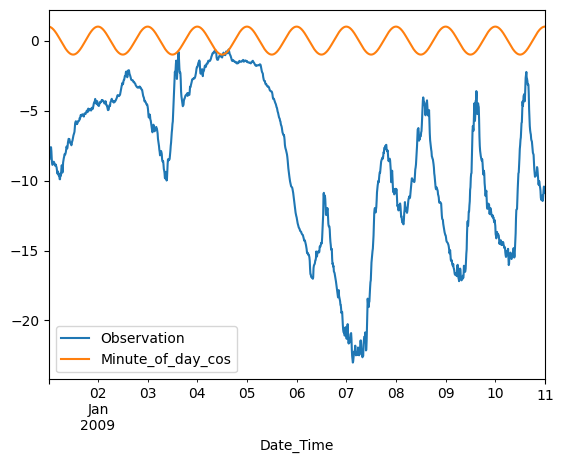

In [1]:
import forecasting_system.data_access_layer as dal
import forecasting_system.data_processor as dp
import forecasting_system.data_analyser as da
import forecasting_system.modeller as m
import datetime as dt
import numpy as np


observation_data = dal.read_data_file('jena_climate_2009_2016.csv')
observation_data = dp.format_jena_climate_data(observation_data, 'T (degC)', [])

# create basic calendar variables
observation_data['Minute_of_day'] = observation_data.index.to_series().dt.hour * 60 + observation_data.index.to_series().dt.minute
observation_data['Minute_of_day_cos'] = np.cos((observation_data['Minute_of_day']) * (2 * np.pi / 1440))
#observation_data.head(10)
observation_data[['Observation', 'Minute_of_day_cos']][1:1440].plot()

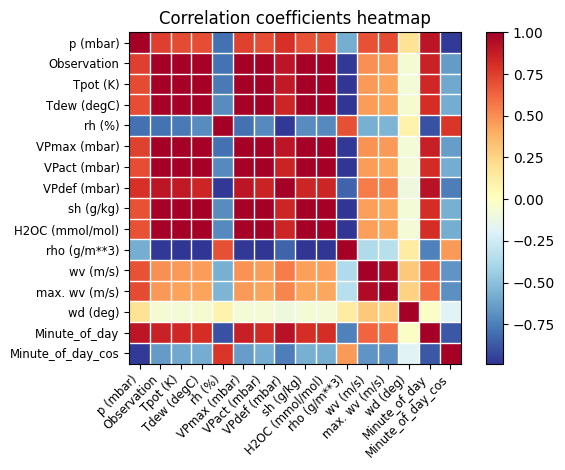

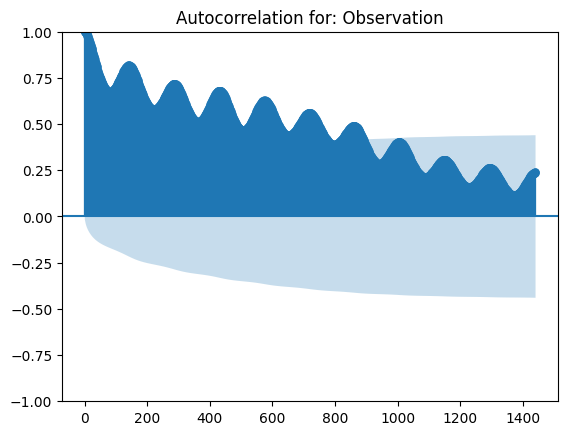

In [2]:
da.plot_correlation_heatmap(observation_data[1:100])
da.plot_autocorrelation(observation_data['Observation'][1:14400], 1440)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 50)                10800     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


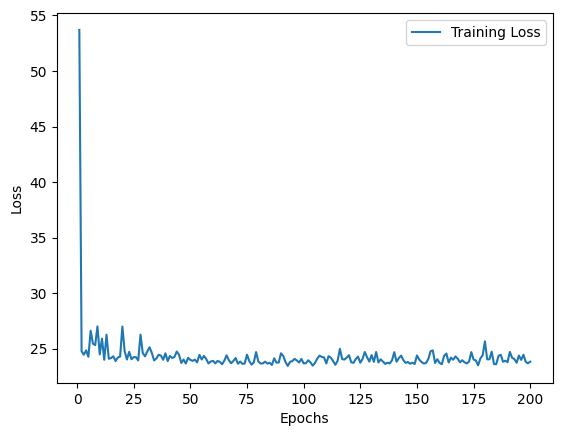

Trained Model (Lstm, {'normalise': False, 'Learning_rate': 0.01, 'Epochs': 200, 'Loss_function': 'mse', 'Plot_loss': True, 'variables': ['p (mbar)', 'wv (m/s)', 'Minute_of_day_cos']}) <keras.src.engine.sequential.Sequential object at 0x00000199C29577D0>


In [50]:
configuration = {
    # LSTM options
    'normalise': False,
    'Learning_rate': 0.01,
    'Epochs': 200,
    'Loss_function': 'mse',
    'Plot_loss': True,
    'variables': ['p (mbar)', 'wv (m/s)', 'Minute_of_day_cos']
}

model = m.create_model('Lstm', configuration)
m.train_model(model, observation_data, '2009-01-01', '2009-01-07')
print(model)

32/32 [==============================] - 0s 710us/step
{'MAE': 4.931177649815246, 'RMSE': 6.180523112170956, 'MAPE': 1.1639049320574266}


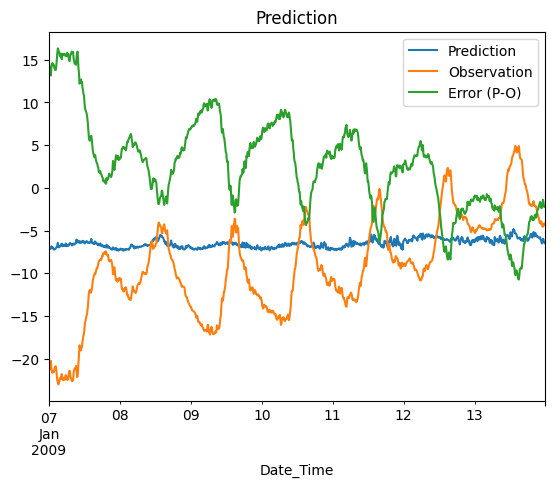

In [51]:
prediction = m.predict_from_model(model, observation_data, '2009-01-07', 7*24*6, dt.timedelta(minutes=10))
print(prediction.calculate_metrics())
prediction.plot()